<a href="https://colab.research.google.com/github/makar-sasha/colab/blob/master/stock_price_w2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split
sns.set(rc={'figure.figsize':(11, 4)})

In [29]:
!pip install yfinance --upgrade --no-cache-dir

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.45)


In [3]:
from google.colab import drive
drive.mount('drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at drive


In [30]:
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()
df = pdr.get_data_yahoo("MCD", start="2018-01-01").reset_index()
df.to_csv('MCD.csv',index=False)

[*********************100%***********************]  1 of 1 downloaded


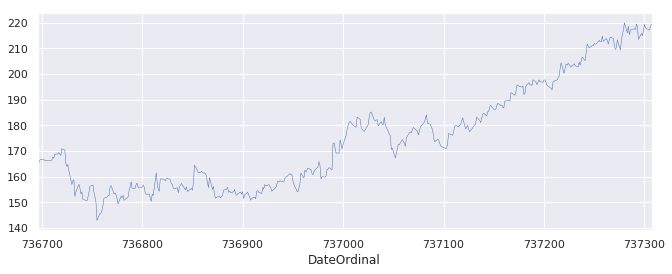

In [31]:
import datetime as dt
df['DateOrdinal']=df['Date'].map(dt.datetime.toordinal)
df.set_index('DateOrdinal', inplace=True)
df['Adj Close'].plot(linewidth=0.5)

In [0]:
Y = df[["Adj Close"]]
Y_train, Y_test = train_test_split(Y, test_size=0.33, random_state=42)
X_train = Y_train.index.values.reshape(-1, 1)
X_test = Y_test.index.values.reshape(-1, 1)


**Linear Regression**

---



In [33]:
linemodel = LinearRegression() 
linemodel.fit(X_train, Y_train)
Y_test_pred = linemodel.predict(X_test)

linescore = linemodel.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (linescore*100.0))

Accuracy: 79.42%


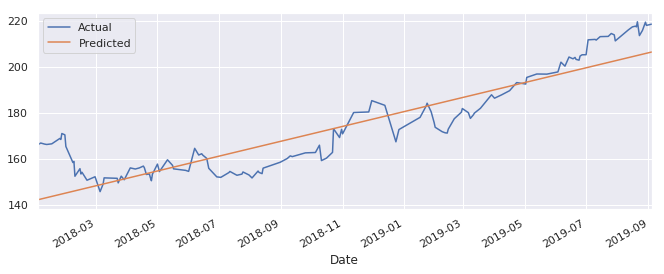

In [34]:
chart = pd.DataFrame({'Date': X_test[:,0], 'Actual': Y_test['Adj Close'].values, 'Predicted': Y_test_pred[:,0]})
chart['Date'] = chart['Date'].map(dt.datetime.fromordinal)
chart.set_index('Date', inplace=True)
chart.plot(y = ['Actual', 'Predicted'])


**Polynomial Regression**

---



In [35]:
polymodel = make_pipeline(PolynomialFeatures(3), Ridge())
polymodel.fit(X_train, Y_train)
Y_test_pred = polymodel.predict(X_test)

polyscore = polymodel.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (polyscore*100.0))

Accuracy: 94.46%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.67394e-32): result may not be accurate.
  overwrite_a=True).T


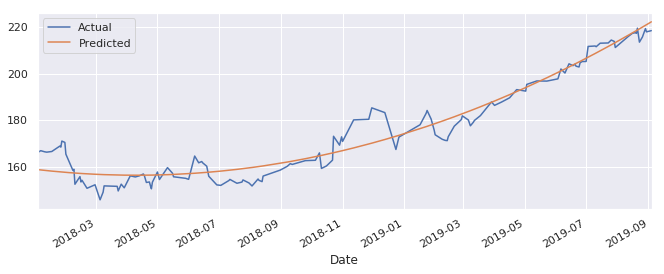

In [36]:
chart['Predicted'] = Y_test_pred[:,0]
chart.plot(y = ['Actual', 'Predicted'])


**KNN Regression**


---



In [37]:
knnmodel = KNeighborsRegressor(n_neighbors=2)
knnmodel.fit(X_train, Y_train)
Y_test_pred = knnmodel.predict(X_test)

knnscore = knnmodel.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (knnscore*100.0))

Accuracy: 99.25%


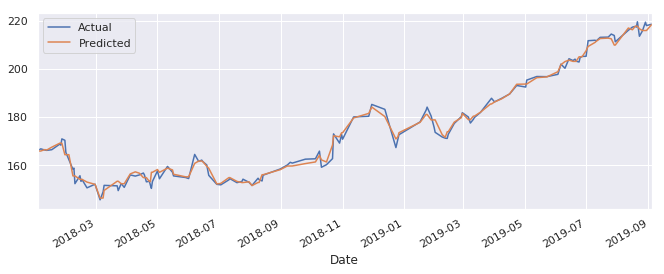

In [38]:
chart['Predicted'] = Y_test_pred[:,0]
chart.plot(y = ['Actual', 'Predicted'])


**RESULTS**


---



In [40]:
print("KNN Regression Accuracy: %.2f%%" % (knnscore*100.0))
print("Polynomial Regression Accuracy: %.2f%%" % (polyscore*100.0))
print("Linear Regression Accuracy: %.2f%%" % (linescore*100.0))

KNN Regression Accuracy: 99.25%
Polynomial Regression Accuracy: 94.46%
Linear Regression Accuracy: 79.42%
